# Processing the besluithistorie JSON

In [8]:
# importing the necessary packages
import numpy as np
import pandas as pd
import os
import re
import pickle
from tqdm import tqdm
import request
import json
import pdfplumber

os.chdir("C:\\Users\\SJNic\\Documents\\University\\Master\\Thesis\\Thesis Code")

with open('Besluithistorie/besluithistorie.json') as f:
    file = json.load(f)
with open("NewProcessingData/documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)

In [72]:

import pdfplumber

# regex for retrieving the IDS from an URI
regex = re.compile('([a-zA-Z\d]{8}-[a-zA-Z\d]{4}-[a-zA-Z\d]{4}-[a-zA-Z\d]{4}-[a-zA-Z\d]{12})')

# dictionary with the besluithistorie ID as key and the docs referenced in them attached
besluithistorieDict = {}

missingBesluithistories = []

nonMatchingKeys = 0
matchingKeys = 0

# loop through every besluithistorie in the json file
for item in tqdm(file["items"]):
   # url = item["tuple"][0]["id"]

    # get the id for this file
    itemID = item["tuple"][0]["attributes"]["http://schema.org/identifier"]
    
    # get the unique ID for this document
    uniqueDocID = documentsInformation[itemID]["unique id"]
    
        # somtimes the reference is 
    if str(type(uniqueDocID))  == "<class 'dict'>":
        uniqueDocID = uniqueDocID["id"]
    
    docsInBesluithistorie = []
    
    # some pdfs cannot be read sadly, so skip those but store the missing ids
    try: 
        with pdfplumber.open(f"PDFs/UniqueDocuments/{uniqueDocID}.pdf") as pdf:
            # loop through the pages and add the text of each page to the overall text of the pdf
            for page in pdf.hyperlinks:
                uri = page["uri"]
                
                # get the docID from the url
                docID = regex.search(uri)

                if docID != None:
                    docID = docID.group()
                else :
                    continue
                
                # try checking if it exists in the documentsInformation
                try:
                    documentsInformation[docID]
                    matchingKeys += 1
                except:
                    nonMatchingKeys += 1

                docsInBesluithistorie.append(docID)
    except:
        missingBesluithistories.append(uniqueDocID)
    
    besluithistorieDict[uniqueDocID] = docsInBesluithistorie
nonMatchingKeys

100%|█████████▉| 209/210 [00:06<00:00, 30.07it/s]


KeyError: '275e1524-2938-4ac8-8a5c-76dd5b08ad7d'

In [77]:
#besluithistorieDict
with open("Besluithistorie/besluithistorieDict.pkl", "wb") as fp:
    pickle.dump(besluithistorieDict, fp)

In [76]:
print("matchingKeys:\t\t", matchingKeys)
print("nonMatchingKeys:\t",nonMatchingKeys)
print("missingBesluithistories:", len(missingBesluithistories))
print("besluithistorieDict: \t",len(besluithistorieDict))

matchingKeys:		 40
nonMatchingKeys:	 623
missingBesluithistories: 22
besluithistorieDict: 	 170


In [74]:
len(documentsInformation)

52137

In [56]:
print(len(docsInBesluithistorie))
docsInBesluithistorie

14


['447b89ba-f685-4c4d-8485-d27d1c7cf899',
 'd1d3c755-14b0-4429-9f54-10f37506c1fe',
 '2b70f4a5-2e0b-46f5-8c0a-ac53554fe740',
 'f7ede071-b249-48fc-bf9f-796ba3fba65a',
 '28d38e1e-e95e-47cf-8a7d-9e55199e8c9a',
 '00678d55-effe-487a-9516-1f199d8b5a66',
 '00678d55-effe-487a-9516-1f199d8b5a66',
 '13956fc1-39c4-4aca-8adf-daa843686031',
 'ace4f4cb-e0f4-4cbf-b049-386d88128ecc',
 '71bf9d2b-9eee-4fb4-be28-ea843d013b76',
 '96e9f216-f723-4a77-b845-12953c54165a',
 '1e848d79-764d-467d-887a-c7418141cea8',
 '6df38124-4025-411d-92c0-7935fed2e7e2',
 '229adb78-0392-4d8e-8ff3-09180d747b5d']

In [61]:
documentsInformation["ace4f4cb-e0f4-4cbf-b049-386d88128ecc"]

KeyError: 'ace4f4cb-e0f4-4cbf-b049-386d88128ecc'

In [57]:
for docID in docsInBesluithistorie:
    print(documentsInformation[docID])

KeyError: '447b89ba-f685-4c4d-8485-d27d1c7cf899'

Sometimes there is a reference to a document which we cannot process
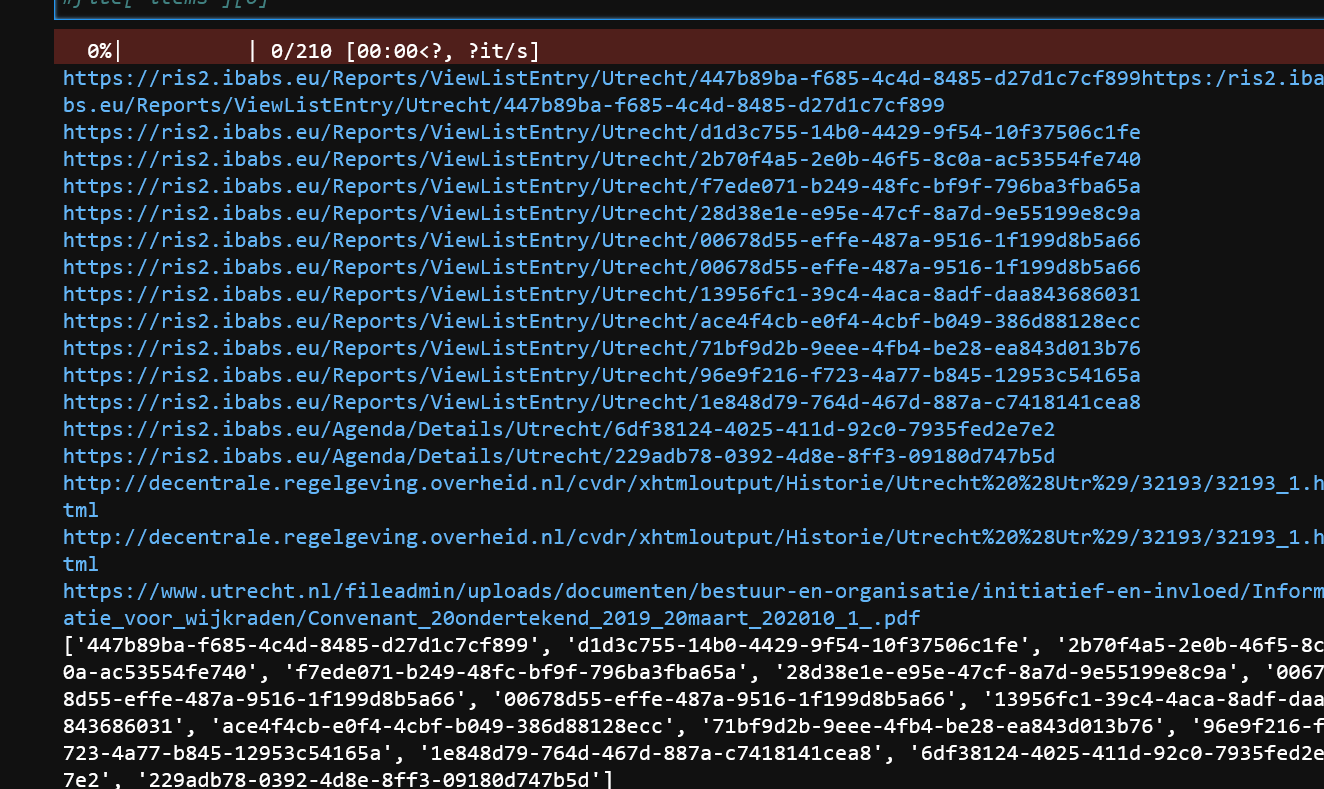